In [70]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
env = pd.read_csv('data/environment.csv', sep=';', header=0)

In [5]:
env = env[['Child_Bosse','School', 'Class', 'Wave', 'GEN_FAS_computer_R', 'GEN_FAS_car_R', 
           'GEN_FAS_vacation_R', 'GEN_FAS_ownroom_R']]

In [7]:
classes=[67, 71, 72, 74, 77, 78, 79, 81, 83, 86, 100, 101, 103, 121, 
         122, 125, 126, 127, 129, 130, 131, 133, 135, 136, 138, 139]

In [9]:
# Get only data from the classes
env = env[env['Class'].isin(classes)]

In [21]:
list_children = list(set(env.Child_Bosse))
len(list(set(env.Child_Bosse)))

460

# Verifying if all the kids have unique answers

In [41]:
def all_same(items):
    return all(x == items[0] for x in items)

def all_nan(items):
    return all(np.isnan(x) for x in items)

In [50]:
# Proof that all the answers are unique
# If it does not print anything, it means all the values are unique

for child in list_children:
    child_df = env[env.Child_Bosse == child]
    # Test if all kids have the 4 waves
    if len(child_df) < 4:
        print(child, len(child_df))

    # Test if all kids have same answer for class
    class_list = list(child_df.Class)
    if not all_same(class_list):
        print(child, class_list)
    
    # Test if all kids have same answer for cars (including nan's)
    cars_list = list(child_df.GEN_FAS_car_R)
    if not all_same(cars_list):
        if not all_nan(cars_list):
            print(child, cars_list)
    
    # Test if all kids have same answer for computers (including nan's)
    computers_list = list(child_df.GEN_FAS_computer_R)
    if not all_same(computers_list):
        if not all_nan(computers_list):
            print(child, computers_list)
    
    # Test if all kids have same answer for ownroom (including nan's)
    ownroom_list = list(child_df.GEN_FAS_ownroom_R)
    if not all_same(ownroom_list):
        if not all_nan(ownroom_list):
            print(child, ownroom_list)
            

    # Test if all kids have same answer for ownroom (including nan's)
    vacation_list = list(child_df.GEN_FAS_vacation_R)
    if not all_same(vacation_list):
        if not all_nan(vacation_list):
            print(child, vacation_list)
            

# As all the values are unique, we take wave 1 as our unique reference.

In [53]:
env_filter = env[env.Wave==1][['Child_Bosse', 'GEN_FAS_computer_R', 'GEN_FAS_car_R', 
                               'GEN_FAS_vacation_R', 'GEN_FAS_ownroom_R']].copy()

In [55]:
env_filter['FAS_Score_R'] = env_filter['GEN_FAS_computer_R'] + env_filter['GEN_FAS_vacation_R'] + \
                            env_filter['GEN_FAS_car_R']*1.5 + env_filter['GEN_FAS_ownroom_R']*3

# To keep the values between 0 and 2.
env_filter.FAS_Score_R = env_filter.FAS_Score_R/6

In [57]:
env_filter.index = env_filter['Child_Bosse']

In [64]:
len(env_filter[pd.isna(env_filter.FAS_Score_R)])

100

In [65]:
score = env_filter.FAS_Score_R

In [101]:
score.mean()

0.524074074074074

In [91]:
score.std()

0.33460630756961773

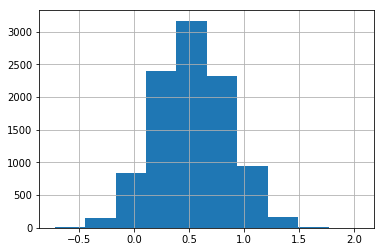

In [111]:
pd.Series(np.random.normal(score.mean(), score.std(), 10000)).hist()

In [119]:
env_dict = dict(env_filter['FAS_Score_R'])

In [120]:
for key, value in env_dict.items():
    if np.isnan(value):
        env_dict[key] = env_filter.FAS_Score_R.mean()
        print(key, value, env_dict[key])

963 nan 0.524074074074074
973 nan 0.524074074074074
982 nan 0.524074074074074
985 nan 0.524074074074074
1083 nan 0.524074074074074
1098 nan 0.524074074074074
1101 nan 0.524074074074074
1105 nan 0.524074074074074
1107 nan 0.524074074074074
1119 nan 0.524074074074074
1120 nan 0.524074074074074
1123 nan 0.524074074074074
1126 nan 0.524074074074074
1134 nan 0.524074074074074
1137 nan 0.524074074074074
1292 nan 0.524074074074074
1155 nan 0.524074074074074
1157 nan 0.524074074074074
1158 nan 0.524074074074074
1160 nan 0.524074074074074
1168 nan 0.524074074074074
1278 nan 0.524074074074074
1468 nan 0.524074074074074
1469 nan 0.524074074074074
1348 nan 0.524074074074074
1355 nan 0.524074074074074
1554 nan 0.524074074074074
1564 nan 0.524074074074074
2007 nan 0.524074074074074
2010 nan 0.524074074074074
2019 nan 0.524074074074074
2020 nan 0.524074074074074
2021 nan 0.524074074074074
3058 nan 0.524074074074074
2051 nan 0.524074074074074
2583 nan 0.524074074074074
2588 nan 0.524074074074074
2590 